# Example of using the Borehole3D class

## Imports

In [1]:
from striplog import Component, Decor, Legend, Lexicon, Striplog
from core.omf import Borehole3D, striplog_legend_to_omf_legend 
from utils.lexicon.lexicon_memoris import lexicon_memoris, lithology_memoris, pollutant_memoris
from utils.io import boreholes_from_files, gdf_viewer
from core.core import Project
from core.orm import BoreholeOrm, PositionOrm, Base 
import random
from os import remove
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from definitions import ROOT_DIR

/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/legend.py:687: UserWarning: This legend contains duplicate components.
  warnings.warn(w)
/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/legend.py:687: UserWarning: This legend contains duplicate components.
  warnings.warn(w)


## Reading of CSV files in a dir

In [2]:
#df = pd.read_csv('test_data_boreholes.csv', sep=',') # use english lexicon
df = pd.read_csv('test_litho_fr.csv', sep=',') # use french lexicon

## Data Checking

In [3]:
#pol = ['As', 'Ni', 'Cl', 'Hg', 'Pb', 'Zn']
pol = ['VR','VS','VI']
#df[['Pollutant', 'Concentration']] = ''
df[['Pollutant', 'Concentration']] = ''
df['Pollutant'] = df['Pollutant'].apply(lambda x: random.sample(pol, 1)[0])
df['Concentration'] = df['Concentration'].apply(lambda x: np.random.randint(0,100))
df['Unit'] = 'mg/l'

In [4]:
df['Lithology'] = df['Lithology'].replace({'Grès':'Marne', 'Calcaire':'Dolomie'})

In [5]:
df.loc[35.5, :] = ['BH007',152794.0, 121111.0, 60.0, 0.57, 45, 'Calcaire', 'Bleu', 4, 41, 45, 'Cl', 78, 'mg/l']
df.loc[25.5, :] = ['BH005',152473.0, 121460.0, 72.0, 0.61, 32, 'Schiste', 'gris', 3, 29, 32, 'Cl', 78, 'mg/l']
df.drop(index=4, inplace=True)
df.drop(columns='Colour', inplace=True)
df = df.sort_index().reset_index(drop=True)

In [6]:
gdf_viewer(df)

Rows : 996, columns : 13


interactive(children=(IntSlider(value=10, description='rows', max=996, min=10, readout=False), IntSlider(value…

## Create Boreholes from dataframes or files

In [7]:
bhs_df=[df[0:50]] # list of dataframes

In [8]:
boreholes, components, link_intv_comp = boreholes_from_files(bhs_df, verbose=False,
                                                litho_field=['Lithology', 'Pollutant'], 
                                                color_field='Colour', lexicon=lexicon_memoris, 
                                                diam_field='Diameter', thick_field='Thickness')

/home/yanathan/Projects/GSDMA/utils/io.py:469: SAWarning: relationship 'ComponentOrm.intervals' will copy column Components.id to column Linkintervalcomponent.comp_id, which conflicts with relationship(s): 'IntervalOrm.components' (copies Components.id to Linkintervalcomponent.comp_id). If this is not the intention, consider if these relationships should be linked with back_populates, or if viewonly=True should be applied to one or more if they are read-only. For the less common case that foreign key constraints are partially overlapping, the orm.foreign() annotation can be used to isolate the columns that should be written towards.   The 'overlaps' parameter may be used to remove this warning.
  boreholes.append(BoreholeOrm(id=bh_name))
/home/yanathan/Projects/GSDMA/utils/io.py:469: SAWarning: relationship 'ComponentOrm.intervals' will copy column Intervals.id to column Linkintervalcomponent.int_id, which conflicts with relationship(s): 'IntervalOrm.components' (copies Intervals.id to


Dataframe 0 processing...
|__ID:'BH001'
{'lithology': 'sable', 'pollutant': 'vi'}
{'lithology': 'argile', 'pollutant': 'vs'}
{'lithology': 'marne', 'pollutant': 'vr'}
{'lithology': 'charbon', 'pollutant': 'vs'}
Summary : [Striplog(4 Intervals, start=0.0, stop=28.0)]
|__ID:'BH002'
{'lithology': 'sable', 'pollutant': 'vi'}
{'lithology': 'argile', 'pollutant': 'vs'}
{'lithology': 'marne', 'pollutant': 'vs'}
{'lithology': 'charbon', 'pollutant': 'vs'}
{'lithology': 'dolomie', 'pollutant': 'vr'}
Summary : [Striplog(5 Intervals, start=0.0, stop=37.0)]
|__ID:'BH003'
{'lithology': 'sable', 'pollutant': 'vr'}
{'lithology': 'argile', 'pollutant': 'vi'}
{'lithology': 'marne', 'pollutant': 'vr'}
{'lithology': 'charbon', 'pollutant': 'vs'}
{'lithology': 'dolomie', 'pollutant': 'vi'}
Summary : [Striplog(5 Intervals, start=0.0, stop=18.0)]
|__ID:'BH004'
{'lithology': 'sable', 'pollutant': 'vi'}
{'lithology': 'argile', 'pollutant': 'vi'}
{'lithology': 'marne', 'pollutant': 'vi'}
{'lithology': 'charbo

In [9]:
boreholes

[<core.orm.BoreholeOrm>(Name=BH001, Length=28.0, Diameter=0.43, Intervals=4),
 <core.orm.BoreholeOrm>(Name=BH002, Length=37.0, Diameter=0.6, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH003, Length=18.0, Diameter=0.41, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH004, Length=26.0, Diameter=0.61, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH005, Length=32.0, Diameter=0.61, Intervals=6),
 <core.orm.BoreholeOrm>(Name=BH006, Length=26.0, Diameter=0.31, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH007, Length=45.0, Diameter=0.57, Intervals=6),
 <core.orm.BoreholeOrm>(Name=BH008, Length=35.0, Diameter=0.39, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH009, Length=40.0, Diameter=0.5, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH10, Length=14.0, Diameter=0.31, Intervals=4)]

In [10]:
components

{0: Component({'lithology': 'marne', 'pollutant': 'vr'}),
 1: Component({'lithology': 'charbon', 'pollutant': 'vs'}),
 2: Component({'lithology': 'argile', 'pollutant': 'vs'}),
 3: Component({'lithology': 'sable', 'pollutant': 'vi'}),
 4: Component({'lithology': 'dolomie', 'pollutant': 'vr'}),
 5: Component({'lithology': 'marne', 'pollutant': 'vs'}),
 6: Component({'lithology': 'dolomie', 'pollutant': 'vi'}),
 7: Component({'lithology': 'argile', 'pollutant': 'vi'}),
 8: Component({'lithology': 'sable', 'pollutant': 'vr'}),
 9: Component({'lithology': 'dolomie', 'pollutant': 'vs'}),
 10: Component({'lithology': 'marne', 'pollutant': 'vi'}),
 11: Component({'lithology': 'charbon', 'pollutant': 'vr'}),
 12: Component({'lithology': 'schiste'}),
 13: Component({'lithology': 'calcaire'}),
 14: Component({'lithology': 'charbon', 'pollutant': 'vi'}),
 15: Component({'lithology': 'sable', 'pollutant': 'vs'}),
 16: Component({'lithology': 'argile', 'pollutant': 'vr'})}

In [11]:
len(boreholes), len(components)

(10, 17)

## Create a project and save data in a database

In [12]:
remove('tmp_files/tfe_orm_db.db')

In [13]:
engine = create_engine('sqlite:///tmp_files/tfe_orm_db.db', echo=True)

In [14]:
Base.metadata.create_all(engine)

2021-07-05 03:19:09,785 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-07-05 03:19:09,786 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Boreholes")
2021-07-05 03:19:09,787 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-07-05 03:19:09,788 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Boreholes")
2021-07-05 03:19:09,789 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-07-05 03:19:09,790 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Positions")
2021-07-05 03:19:09,791 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-07-05 03:19:09,791 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Positions")
2021-07-05 03:19:09,792 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-07-05 03:19:09,793 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("IntervalData")
2021-07-05 03:19:09,793 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-07-05 03:19:09,794 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("IntervalData")
2021-07-05 03:19:09,794 INFO sqlalchemy.engine.E

In [15]:
Session = sessionmaker(bind=engine)
session = Session()

## Define project legend(s) and default attribute for representation

In [16]:
p = Project(session, lexicon=lexicon_memoris, repr_attribute='lithology',
            legend_dict={'lithology':{'legend':lithology_memoris}, 'pollutant':{'legend':pollutant_memoris}},)

2021-07-05 03:19:09,847 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-07-05 03:19:09,851 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-07-05 03:19:09,852 INFO sqlalchemy.engine.Engine [generated in 0.00097s] ()


In [17]:
p.add_components(components)

2021-07-05 03:19:09,861 INFO sqlalchemy.engine.Engine INSERT INTO "Components" (id, description) VALUES (?, ?)
2021-07-05 03:19:09,863 INFO sqlalchemy.engine.Engine [generated in 0.00227s] ((0, 'Marne, vr'), (1, 'Charbon, vs'), (2, 'Argile, vs'), (3, 'Sable, vi'), (4, 'Dolomie, vr'), (5, 'Marne, vs'), (6, 'Dolomie, vi'), (7, 'Argile, vi')  ... displaying 10 of 17 total bound parameter sets ...  (15, 'Sable, vs'), (16, 'Argile, vr'))
2021-07-05 03:19:09,865 INFO sqlalchemy.engine.Engine COMMIT
2021-07-05 03:19:09,869 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-07-05 03:19:09,870 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-07-05 03:19:09,871 INFO sqlalchemy.engine.Engine [cached since 0.02038s ago] ()


Add boreholes into the project

In [18]:
for bh in boreholes:
    p.add_borehole(bh)

2021-07-05 03:19:09,881 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-07-05 03:19:09,883 INFO sqlalchemy.engine.Engine [generated in 0.00168s] ('BH001', 28.0, 0.43)
2021-07-05 03:19:09,885 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-07-05 03:19:09,886 INFO sqlalchemy.engine.Engine [generated in 0.00160s] ((0, 101.0, 101.0, 101.0, 152600.0, 121039.0), (1, 97.0, 97.0, 97.0, 152600.0, 121039.0), (2, 97.0, 97.0, 97.0, 152600.0, 121039.0), (3, 93.0, 93.0, 93.0, 152600.0, 121039.0), (4, 93.0, 93.0, 93.0, 152600.0, 121039.0), (5, 81.0, 81.0, 81.0, 152600.0, 121039.0), (6, 81.0, 81.0, 81.0, 152600.0, 121039.0), (7, 73.0, 73.0, 73.0, 152600.0, 121039.0))
2021-07-05 03:19:09,889 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id, data_id) VALUES (?, ?, ?, ?, ?, ?, ?)
2021-07-05 03:19:09,890 INFO sqlalchemy.e

2021-07-05 03:19:09,972 INFO sqlalchemy.engine.Engine [cached since 0.05838s ago] (8,)
2021-07-05 03:19:09,974 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-05 03:19:09,975 INFO sqlalchemy.engine.Engine [cached since 0.05701s ago] (9,)
2021-07-05 03:19:09,976 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-05 03:19:09,977 INFO sqlalchemy.engine.Engine [cached since 0.06359s ago] (10,)
2021-07-05 03:19:09,979 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_

2021-07-05 03:19:10,044 INFO sqlalchemy.engine.Engine [cached since 0.1306s ago] (22,)
2021-07-05 03:19:10,045 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-05 03:19:10,046 INFO sqlalchemy.engine.Engine [cached since 0.1285s ago] (23,)
2021-07-05 03:19:10,048 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-05 03:19:10,049 INFO sqlalchemy.engine.Engine [cached since 0.136s ago] (24,)
2021-07-05 03:19:10,051 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id

2021-07-05 03:19:10,109 INFO sqlalchemy.engine.Engine [cached since 0.1961s ago] (36,)
2021-07-05 03:19:10,111 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-05 03:19:10,112 INFO sqlalchemy.engine.Engine [cached since 0.194s ago] (37,)
Borehole geometry created successfully !
2021-07-05 03:19:10,126 INFO sqlalchemy.engine.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-07-05 03:19:10,127 INFO sqlalchemy.engine.Engine [cached since 0.1789s ago] (96.0, 'BH004')
2021-07-05 03:19:10,128 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-07-05 03:19:10,129 INFO sqlalchemy.engine.Engine [cached since 0.2478s ago] ('BH005', 32.0, 0.61)
2021-07-05 03:19:10,130 INFO sqla

2021-07-05 03:19:10,196 INFO sqlalchemy.engine.Engine [cached since 0.2476s ago] (97.0, 'BH005')
2021-07-05 03:19:10,197 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-07-05 03:19:10,197 INFO sqlalchemy.engine.Engine [cached since 0.3163s ago] ('BH006', 26.0, 0.31)
2021-07-05 03:19:10,199 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-07-05 03:19:10,199 INFO sqlalchemy.engine.Engine [cached since 0.3146s ago] ((50, 101.0, 101.0, 101.0, 152375.0, 121002.0), (51, 100.0, 100.0, 100.0, 152375.0, 121002.0), (52, 100.0, 100.0, 100.0, 152375.0, 121002.0), (53, 98.0, 98.0, 98.0, 152375.0, 121002.0), (54, 98.0, 98.0, 98.0, 152375.0, 121002.0), (55, 92.0, 92.0, 92.0, 152375.0, 121002.0), (56, 92.0, 92.0, 92.0, 152375.0, 121002.0), (57, 86.0, 86.0, 86.0, 152375.0, 121002.0), (58, 86.0, 86.0, 86.0, 152375.0, 121002.0), (59, 75.0, 75.0, 75.0, 152375.0, 121002.0))
2021-07-05 03:

2021-07-05 03:19:10,257 INFO sqlalchemy.engine.Engine COMMIT
2021-07-05 03:19:10,261 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-07-05 03:19:10,263 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-07-05 03:19:10,263 INFO sqlalchemy.engine.Engine [cached since 0.4124s ago] ()
2021-07-05 03:19:10,265 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id", "Intervals".data_id AS "Intervals_data_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-07-05 03:19:10,266 INFO sqlalchemy.engine.Engine [cached since 0.3608s ago] ('BH007',)
2021-07-05 03:19:10,268 INFO sqlalchemy.engine.Engine SELECT

2021-07-05 03:19:10,344 INFO sqlalchemy.engine.Engine [cached since 0.4382s ago] ('BH008',)
2021-07-05 03:19:10,346 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-05 03:19:10,347 INFO sqlalchemy.engine.Engine [cached since 0.4332s ago] (72,)
2021-07-05 03:19:10,349 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-05 03:19:10,350 INFO sqlalchemy.engine.Engine [cached since 0.4323s ago] (73,)
2021-07-05 03:19:10,352 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positi

2021-07-05 03:19:10,425 INFO sqlalchemy.engine.Engine [cached since 0.5073s ago] (85,)
2021-07-05 03:19:10,427 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-05 03:19:10,428 INFO sqlalchemy.engine.Engine [cached since 0.5148s ago] (86,)
2021-07-05 03:19:10,430 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-05 03:19:10,431 INFO sqlalchemy.engine.Engine [cached since 0.5134s ago] (87,)
2021-07-05 03:19:10,433 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

Borehole geometry created successfully !


In [19]:
p.add_link_between_components_and_intervals(link_intv_comp)

2021-07-05 03:19:10,523 INFO sqlalchemy.engine.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-07-05 03:19:10,525 INFO sqlalchemy.engine.Engine [cached since 0.5765s ago] (95.0, 'BH10')
2021-07-05 03:19:10,529 INFO sqlalchemy.engine.Engine INSERT INTO "Linkintervalcomponent" (int_id, comp_id, extra_data) VALUES (?, ?, ?)
2021-07-05 03:19:10,530 INFO sqlalchemy.engine.Engine [generated in 0.00137s] ((0, 3, ''), (1, 2, ''), (2, 0, ''), (3, 1, ''), (4, 3, ''), (5, 2, ''), (6, 5, ''), (7, 1, '')  ... displaying 10 of 50 total bound parameter sets ...  (48, 0, ''), (49, 14, ''))
2021-07-05 03:19:10,533 INFO sqlalchemy.engine.Engine COMMIT
2021-07-05 03:19:10,537 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-07-05 03:19:10,538 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-07-05 03:19:10,539 INFO sqlalchemy.engine.Engine [cached sinc

In [20]:
p.commit()
print('Boreholes in the project : ', len(p.boreholes))

2021-07-05 03:19:10,546 INFO sqlalchemy.engine.Engine COMMIT
Boreholes in the project :  10


In [21]:
p.boreholes

2021-07-05 03:19:10,555 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-07-05 03:19:10,558 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-07-05 03:19:10,559 INFO sqlalchemy.engine.Engine [generated in 0.00150s] ('BH001',)
2021-07-05 03:19:10,562 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id", "Intervals".data_id AS "Intervals_data_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-07-05 03:19:10,562 INFO sqlalchemy.engine.Engine [cached since 0.6567s ago] ('BH001',)
2021-07-05 03:19:10,564 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_

2021-07-05 03:19:10,615 INFO sqlalchemy.engine.Engine [cached since 0.71s ago] ('BH10',)


[<core.orm.BoreholeOrm>(Name=BH001, Length=97.0, Diameter=0.43, Intervals=4),
 <core.orm.BoreholeOrm>(Name=BH002, Length=98.0, Diameter=0.6, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH003, Length=100.0, Diameter=0.41, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH004, Length=96.0, Diameter=0.61, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH005, Length=97.0, Diameter=0.61, Intervals=6),
 <core.orm.BoreholeOrm>(Name=BH006, Length=100.0, Diameter=0.31, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH007, Length=97.0, Diameter=0.57, Intervals=6),
 <core.orm.BoreholeOrm>(Name=BH008, Length=98.0, Diameter=0.39, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH009, Length=94.0, Diameter=0.5, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH10, Length=95.0, Diameter=0.31, Intervals=4)]

In [22]:
p.refresh(verbose=False)

2021-07-05 03:19:10,622 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-07-05 03:19:10,624 INFO sqlalchemy.engine.Engine [cached since 0.7726s ago] ()


In [23]:
session.close()

2021-07-05 03:19:10,633 INFO sqlalchemy.engine.Engine ROLLBACK


# 2D/3D Display

In [24]:
attributes = list(p.legend_dict.keys())
attributes

['lithology', 'pollutant']

In [25]:
p.update_legend_cmap(update_all_attrib=True) #[0][attributes[0]]['cmap']

({'lithology': {'legend': Legend(Decor({'_colour': '#ffcb23', 'width': 3, 'hatch': "'..'", 'component': Component({'lithology': 'sable'})})
   Decor({'_colour': '#d5e6cc', 'width': 3, 'hatch': "'---'", 'component': Component({'lithology': 'argile'})})
   Decor({'_colour': '#7ba1a8', 'width': 3, 'hatch': None, 'component': Component({'lithology': 'marne'})})
   Decor({'_colour': '#000000', 'width': 3, 'hatch': None, 'component': Component({'lithology': 'charbon'})})
   Decor({'_colour': '#fdaffe', 'width': 3, 'hatch': None, 'component': Component({'lithology': 'dolomie'})})
   Decor({'_colour': '#bbffdd', 'width': 3, 'hatch': "'--'", 'component': Component({'lithology': 'schiste'})})
   Decor({'_colour': '#149eff', 'width': 3, 'hatch': "'='", 'component': Component({'lithology': 'calcaire'})})),
   'cmap': <matplotlib.colors.ListedColormap at 0x7f6bbd790ac0>,
   'values': ['sable',
    'argile',
    'marne',
    'charbon',
    'dolomie',
    'schiste',
    'calcaire']},
  'pollutant': {

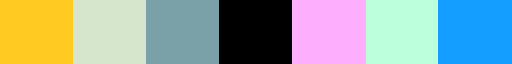

In [26]:
p.legend_dict[attributes[0]]['cmap']

## Display one object (attribute = 'lithology')

In [27]:
bh = 1
p.boreholes_3d[bh]._components

[Component({'lithology': 'sable', 'pollutant': 'vi'}),
 Component({'lithology': 'argile', 'pollutant': 'vs'}),
 Component({'lithology': 'marne', 'pollutant': 'vs'}),
 Component({'lithology': 'charbon', 'pollutant': 'vs'}),
 Component({'lithology': 'dolomie', 'pollutant': 'vr'})]

/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/striplog.py:1505: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "'". Passing invalid values is deprecated since 3.4 and will become an error two minor releases later.
  rect = mpl.patches.Rectangle(origin,
/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/legend.py:311: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "'". Passing invalid values is deprecated since 3.4 and will become an error two minor releases later.
  rect1 = patches.Rectangle((0, 0),


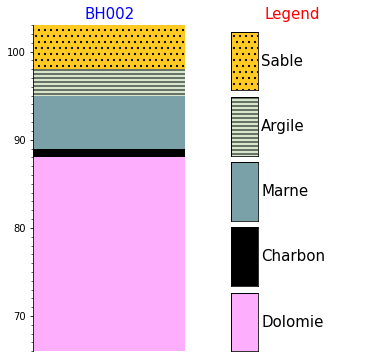

In [28]:
p.boreholes_3d[bh].log_plot()

In [29]:
sargs = dict(title='test', title_font_size=30, label_font_size=12, n_labels=0,
             fmt="%.2f", font_family="arial", color='k',interactive=True, 
             vertical=True, italic=True, shadow=False,)

In [30]:
bh=1
p.boreholes_3d[bh].plot3d(custom_legend=False, scalar_bar_args=sargs)

5 0.8 {0.4: 'Sable', 1.2000000000000002: 'Argile', 2.0: 'Marne', 2.8000000000000003: 'Charbon', 3.6: 'Dolomie'}


ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

## Plot with another attribute

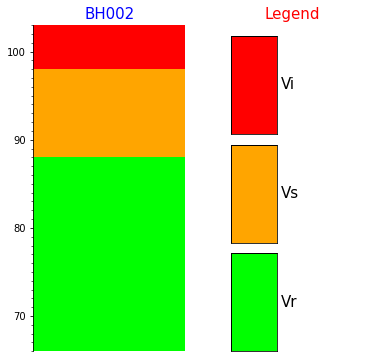

In [31]:
p.boreholes_3d[bh].log_plot(repr_attribute=attributes[1])

In [32]:
p.boreholes_3d[bh].plot3d(repr_attribute=attributes[1])

3 0.6666666666666666 {0.3333333333333333: 'Vi', 1.0: 'Vs', 1.6666666666666665: 'Vr'}


ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

### Display project boreholes

In [33]:
p.plot3d(repr_attribute=attributes[0], labels_size=15, bg_color=["royalblue", "aliceblue"], window_size=(1300, 1000))

7 0.8571428571428571 {0.42857142857142855: 'Sable', 1.2857142857142856: 'Argile', 2.142857142857143: 'Marne', 3.0: 'Charbon', 3.8571428571428568: 'Dolomie', 4.7142857142857135: 'Schiste', 5.571428571428571: 'Calcaire'}
7 0.8571428571428571 {0.42857142857142855: 'Sable', 1.2857142857142856: 'Argile', 2.142857142857143: 'Marne', 3.0: 'Charbon', 3.8571428571428568: 'Dolomie', 4.7142857142857135: 'Schiste', 5.571428571428571: 'Calcaire'}
7 0.8571428571428571 {0.42857142857142855: 'Sable', 1.2857142857142856: 'Argile', 2.142857142857143: 'Marne', 3.0: 'Charbon', 3.8571428571428568: 'Dolomie', 4.7142857142857135: 'Schiste', 5.571428571428571: 'Calcaire'}
7 0.8571428571428571 {0.42857142857142855: 'Sable', 1.2857142857142856: 'Argile', 2.142857142857143: 'Marne', 3.0: 'Charbon', 3.8571428571428568: 'Dolomie', 4.7142857142857135: 'Schiste', 5.571428571428571: 'Calcaire'}
7 0.8571428571428571 {0.42857142857142855: 'Sable', 1.2857142857142856: 'Argile', 2.142857142857143: 'Marne', 3.0: 'Charbon'

### Boreholes in 3D using X3D for interaction within the notebook